In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from model_vizualisation_data import ModelVizualizationData

In [2]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1512, 32)

## 1. Preparing Data for Models

In [3]:
X = df.drop(labels=['TotalGHGEmissions','SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity','Large Office'], axis=1, inplace=False)

In [4]:
target_GHGEmission_log = np.log(df['TotalGHGEmissions'] + 1)
target_GHGEmission = df['TotalGHGEmissions']

In [5]:
df = df.drop(labels=['TotalGHGEmissions','SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity','Large Office'], axis=1, inplace=False)

In [6]:
X

,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,ProportionParkingGFA,ProportionElectricity(kBtu),ProportionNaturalGas(kBtu),ProportionSteamUse(kBtu),Distribution Center,Hospital,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,85,12,88434,60.0,0.000000,0.546060,0.176638,0.277302,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,11,103566,61.0,0.145453,0.386609,0.613391,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,10,61320,56.0,0.000000,0.407519,0.266567,0.325913,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,18,175580,75.0,0.353115,0.378802,0.621198,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,2,97288,73.0,0.382349,0.609884,0.390116,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,25,1,12294,46.0,0.000000,0.616974,0.383026,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1508,11,1,16000,73.0,0.000000,0.417296,0.582704,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1509,41,1,13157,73.0,0.000000,0.310820,0.689180,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1510,26,1,14101,73.0,0.000000,0.484898,0.515102,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,target_GHGEmission_log, test_size=0.2, random_state=42)

In [8]:
#Scaling numeric features using sklearn StandardScalar
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## 2. Build Models

### 2.1 Linear Regression

In [9]:
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y
lr.fit(X_train_std, y_train)
ypred = lr.predict(X_test_std)
# ypred = np.exp(ypred) - 1

#Metrics to evaluate your model
print('LINEAR')
# print('r2 score:',r2_score(y_test, ypred))
# print('mean absolute error',mean_absolute_error(y_test, ypred))
# print('RMSE',np.sqrt(mean_squared_error(y_test, ypred)))

print('r2 score:',r2_score(y_test, ypred))
print('MAE :',mean_absolute_error(np.exp(y_test), np.exp(ypred)))
print('RMSE:',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(ypred))))

print("Train R-squared: %.2f" %lr.score(X_train_std, y_train))
print("Test R-squared: %.2f" %lr.score(X_test_std, y_test))

LINEAR
r2 score: 0.7477060750380862
MAE : 38.37877047895015
RMSE: 79.86251037990067
Train R-squared: 0.76
Test R-squared: 0.75


### 2.2 Decision Tree

In [10]:
dt = DecisionTreeRegressor()
dt.fit(X_train_std, y_train)
yhat = dt.predict(X_test_std)
# yhat = np.exp(yhat) - 1


print('DECISION TREE')
# print('r2 score:',r2_score(y_test, yhat))
# print('mean absolute error',mean_absolute_error(y_test, yhat))
# print('RMSE',np.sqrt(mean_squared_error(y_test, yhat)))

print('r2 score:',r2_score(y_test,yhat))
print('MAE:',mean_absolute_error(np.exp(y_test), np.exp(yhat)))
print('RMSE:',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(yhat))))

print("Train R-squared: %.2f" %dt.score(X_train_std, y_train))
print("Test R-squared: %.2f" %dt.score(X_test_std, y_test))

DECISION TREE
r2 score: 0.6247674449479454
MAE: 46.86009900990098
RMSE: 94.85022124189778
Train R-squared: 1.00
Test R-squared: 0.62


### 2.3 Random Forest

In [11]:
model_forest = RandomForestRegressor(n_estimators=70)
model_forest.fit(X_train_std, y_train)
y_pred_forest = model_forest.predict(X_test_std)
y_pred_forest = np.exp(y_pred_forest) - 1

print('RANDOM FOREST')
# print('R2 score:',r2_score(y_test,y_pred_forest))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_forest))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_forest)))

print('r2 score antilog:',r2_score(np.exp(y_test), y_pred_forest))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_test) - 1,y_pred_forest))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_forest)))

print("Train R-squared: %.2f" %model_forest.score(X_train_std, y_train))
print("Test R-squared: %.2f" %model_forest.score(X_test_std, y_test))

RANDOM FOREST
r2 score antilog: 0.7077829809454979
mean absolute error antilog: 35.53024971292453
RMSE antilog 74.52789582720229
Train R-squared: 0.97
Test R-squared: 0.79


### 2.4 Gradient Boosting

In [13]:
model_gradient = GradientBoostingRegressor(n_estimators=1000)

model_gradient.fit(X_train_std,y_train)
y_pred_gradient = model_gradient.predict(X_test_std)
# y_pred_gradient = np.exp(y_pred_gradient) - 1

print('GRADIENT BOOSTING')
# print('R2 score:',r2_score(y_test,y_pred_gradient))
# print('mean absolute error:',mean_absolute_error(y_test,y_pred_gradient))
# print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_gradient)))

print('r2 score antilog:',round(r2_score(y_test, y_pred_gradient),3))
print('mean absolute error antilog:',round(mean_absolute_error(np.exp(y_test),np.exp(y_pred_gradient)),0))
print('RMSE antilog',round(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_gradient))),0))

print("Train R-squared: %.2f" %model_gradient.score(X_train_std, y_train))
print("Test R-squared: %.2f" %model_gradient.score(X_test_std, y_test))
print("Test Adjusted R-squared: %.2f" %round(1-(1-r2_score(y_test, y_pred_gradient))*((len(X_test_std)-1)/(len(X_test_std)-len(X_test_std[0])-1)),3))
print("Train Adjusted R-squared: %.2f" %round(1-(1-r2_score(y_train, model_gradient.predict(X_train_std)))*((len(X_train_std)-1)/(len(X_train_std)-len(X_train_std[0])-1)),3))

GRADIENT BOOSTING
r2 score antilog: 0.811
mean absolute error antilog: 35.0
RMSE antilog 75.0
Train R-squared: 0.99
Test R-squared: 0.81
Test Adjusted R-squared: 0.79
Train Adjusted R-squared: 0.98


Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.


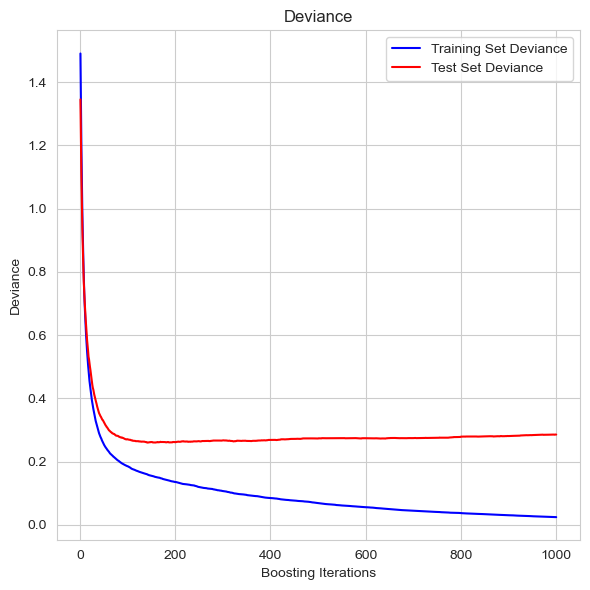

In [14]:
test_score = np.zeros(1000, dtype=np.float64)
for i, y_pred in enumerate(model_gradient.staged_predict(X_test_std)):
    test_score[i] = model_gradient.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(1000) + 1,
    model_gradient.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(1000) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

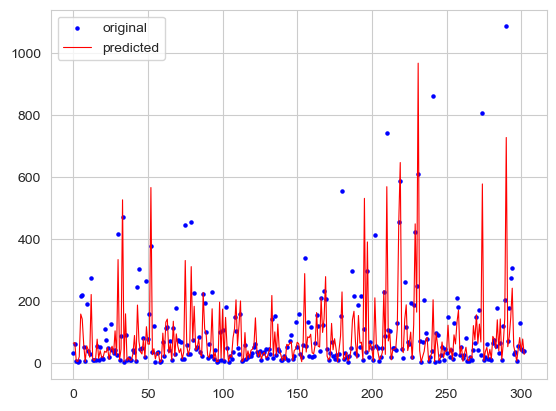

In [15]:
x_ax = range(len(y_test))
plt.scatter(x_ax, np.exp(y_test), s=5, color="blue", label="original")
plt.plot(x_ax, np.exp(y_pred_gradient), lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

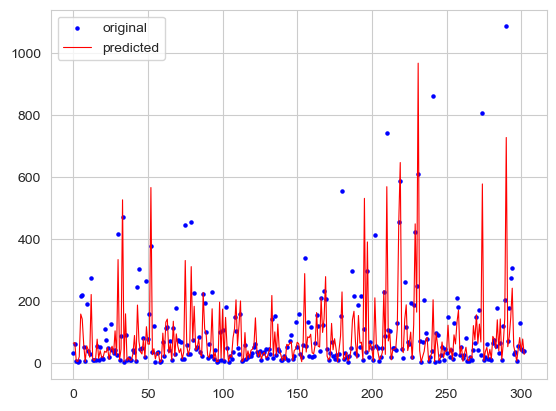

In [15]:
x_ax = range(len(y_test))
plt.scatter(x_ax, np.exp(y_test), s=5, color="blue", label="original")
plt.plot(x_ax, np.exp(y_pred_gradient_grid), lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#### 2.4 [GridSearchCV] Gradient Boosting

In [16]:
estimator = GradientBoostingRegressor()

param_grid = {
    "loss"              : ['squared_error'], #mean residuals vs median residuals
    "n_estimators"      : [100],
    "learning_rate"     : [0.1,0.07],
    "max_features"      : [1.0,20,25],
    "subsample"         : [1.0,0.3,0.7],
    'max_depth'         : [2,4,8],
    "min_samples_split" : [2,4],
}

grid_gradient = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

In [17]:
grid_gradient.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.07],
                         'loss': ['squared_error'], 'max_depth': [2, 4, 8],
                         'max_features': [1.0, 20, 25],
                         'min_samples_split': [2, 4], 'n_estimators': [100],
                         'subsample': [1.0, 0.3, 0.7]})

In [66]:
print(grid_gradient.best_score_)
print(grid_gradient.best_params_)
print("---------------------------")

best_est = grid_gradient.best_estimator_
best_est.score(X_test_std,y_test)

0.8195458363682407
{'learning_rate': 0.07, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.3}
---------------------------


0.8363193947100136

In [72]:
for mean, std, params in zip(grid_gradient.cv_results_['mean_test_score'],
                             grid_gradient.cv_results_['std_test_score'],
                             grid_gradient.cv_results_['params']
                             ):
    if mean > 0.818:
        print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                    std *2,
                                                    params))

	accuracy = 0.820 (+/-0.046) for {'learning_rate': 0.07, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.3}


Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.


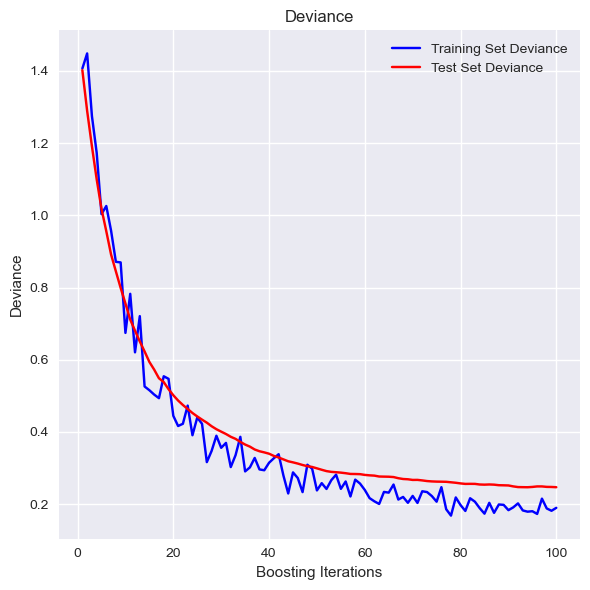

In [83]:
test_score = np.zeros(100, dtype=np.float64)
for i, y_pred in enumerate(best_est.staged_predict(X_test_std)):
    test_score[i] = best_est.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(100) + 1,
    best_est.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(100) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

#### 2.4 Learning Curves

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning

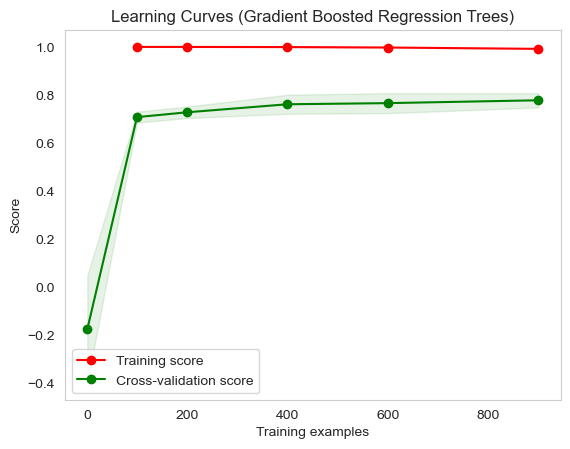

In [19]:
estimator = GradientBoostingRegressor(n_estimators=1000)
train_sizes=[1,100,200,400,600,900]
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train_std, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Gradient Boosted Regression Trees)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.show()

(0.0, 300.0)

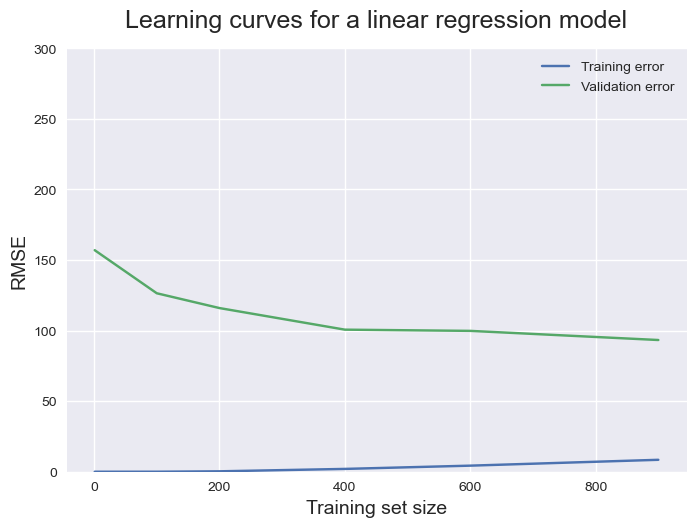

In [20]:
estimator = GradientBoostingRegressor(n_estimators=1000)
train_sizes=[1,100,200,400,600,900]
train_sizes, train_scores, test_scores = learning_curve(
    estimator = estimator,
    X = X_train_std,
    y = np.exp(y_train), train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
# train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -test_scores.mean(axis=1)
# test_scores_std = np.std(-test_scores)

plt.style.use('seaborn')
plt.plot(train_sizes, np.sqrt(train_scores_mean), label = 'Training error')
plt.plot(train_sizes, np.sqrt(validation_scores_mean), label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,300)

# plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
#
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
#
# plt.show()

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: invalid value encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: invalid value encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: divide by zero encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb_losses.py:229: RuntimeWarning: invalid value encountered in double_scalars
  1
/Users/maurelco/opt/anaconda3/lib/python3.9/site-

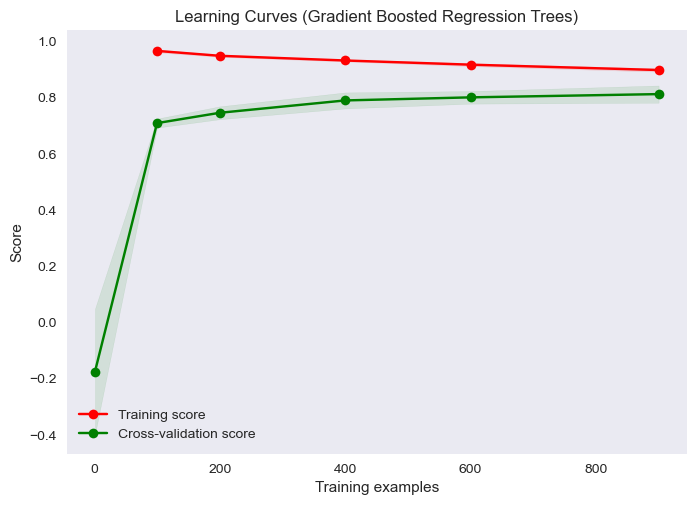

In [21]:
estimator_good = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth, learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf, max_features=best_est.max_features, subsample=best_est.subsample,min_samples_split=best_est.min_samples_split)

train_sizes=[1,100,200,400,600,900]

plt.figure()
plt.title("Learning Curves (Gradient Boosted Regression Trees)")
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(estimator_good, X_train_std, y_train, cv=5, n_jobs=-1, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

plt.show()

divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encoun

(0.0, 200.0)

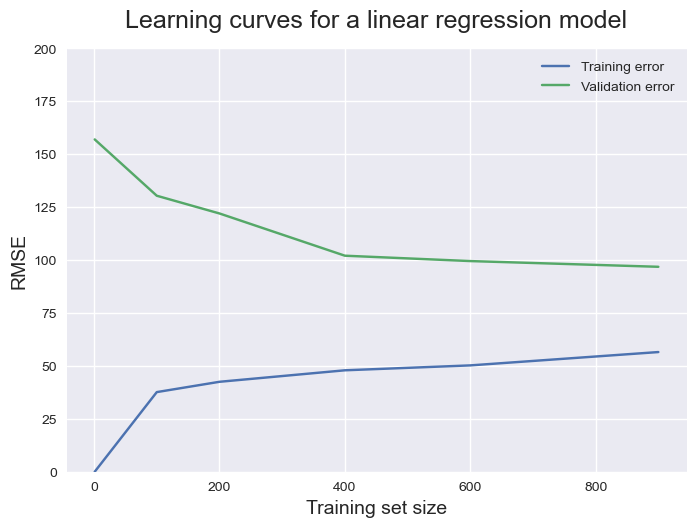

divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encoun

(0.0, 200.0)

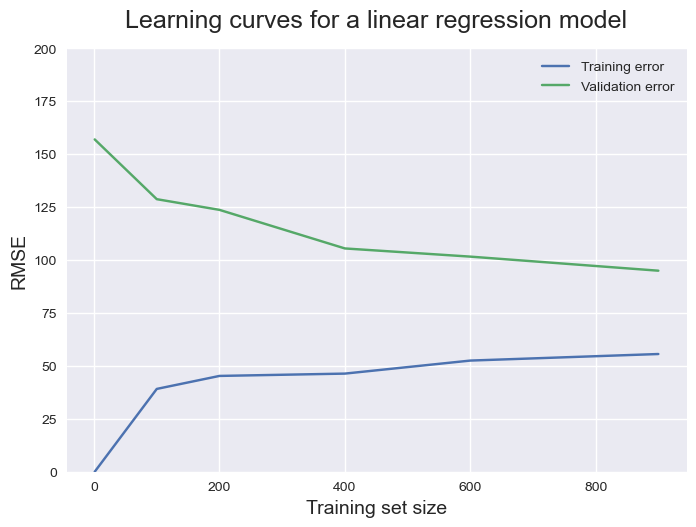

In [23]:
train_sizes=[1,100,200,400,600,900]

estimator_good = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth, learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf, max_features=best_est.max_features, subsample=best_est.subsample,min_samples_split=best_est.min_samples_split)

train_sizes, train_scores, test_scores = learning_curve(
    estimator = estimator_good,
    X = X_train_std,
    y = np.exp(y_train), train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
# train_scores_std = np.std(-train_scores, axis=1)
validation_scores_mean = -test_scores.mean(axis=1)
# test_scores_std = np.std(-test_scores)

plt.style.use('seaborn')
plt.plot(train_sizes, np.sqrt(train_scores_mean), label = 'Training error')
plt.plot(train_sizes, np.sqrt(validation_scores_mean), label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Gradient Boosting model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,200)

# plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
#
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
#
# plt.show()

In [24]:
estimator_good.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.07, max_depth=4, max_features=25,
                          subsample=0.3)

In [25]:
print("Train R-squared: %.2f" %estimator_good.score(X_train_std, y_train))
print("Test R-squared: %.2f" %estimator_good.score(X_test_std, y_test))

Train R-squared: 0.89
Test R-squared: 0.83


#### 2.4 [Performance of Grid Search params on test data] Gradient Boosting

In [73]:
y_pred_gradient_grid = best_est.predict(X_test_std)

In [74]:
y_pred_gradient_grid_train = best_est.predict(X_train_std)

In [76]:
from sklearn import metrics
print(r2_score(y_test, y_pred_gradient_grid))
print(r2_score(y_train, y_pred_gradient_grid_train))
print(mean_absolute_error(np.exp(y_test) -1, y_pred_gradient_grid))
print(np.sqrt(mean_squared_error(np.exp(y_test) - 1,y_pred_gradient_grid)))

0.8363193947100136
0.8932529463142652
89.34859975095809
163.9843429262147


### 2.5 Neural Network - Multilayer Perceptron

In [39]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_std, y_train)
y_pred_neural = regr.predict(X_test_std)
regr.score(X_test_std, y_test)

0.7974454465899791

In [40]:
print('r2 score:',r2_score(y_test,y_pred_neural))
print('MAE:',mean_absolute_error(np.exp(y_test), np.exp(y_pred_neural)))
print('RMSE:',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_neural))))

print("Train R-squared: %.2f" %regr.score(X_train_std, y_train))
print("Test R-squared: %.2f" %regr.score(X_test_std, y_test))
print("Test Adjusted R-squared: %.2f" %round(1-(1-r2_score(y_test, y_pred_neural))*((len(X_test_std)-1)/(len(X_test_std)-len(X_test_std[0])-1)),3))
print("Train Adjusted R-squared: %.2f" %round(1-(1-r2_score(y_train, regr.predict(X_train_std)))*((len(X_train_std)-1)/(len(X_train_std)-len(X_train_std[0])-1)),3))

r2 score: 0.7974454465899791
MAE: 35.75187537792481
RMSE: 85.40443055211085
Train R-squared: 0.87
Test R-squared: 0.80
Test Adjusted R-squared: 0.78
Train Adjusted R-squared: 0.86


In [41]:
estimator_neural = MLPRegressor()

param_grid = {
    "hidden_layer_sizes": [50,100],
    "activation"        : ["logistic", "tanh", "relu"],
    "alpha"             : [0.0001,0.001,0.00001],
    "max_iter"          : [800,1200],
}

grid_neural = GridSearchCV(estimator_neural, param_grid, n_jobs=-1, cv=5)

In [42]:
grid_neural.fit(X_train_std, y_train)

/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maurelco/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/maure

GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 1e-05],
                         'hidden_layer_sizes': [50, 100],
                         'max_iter': [800, 1200]})

In [43]:
print(grid_neural.best_score_)
print(grid_neural.best_params_)
print("---------------------------")

best_est_neural = grid_neural.best_estimator_
best_est_neural.fit(X_train_std, y_train)

0.8106295932055211
{'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'max_iter': 800}
---------------------------


MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=100,
             max_iter=800)

In [47]:
for mean, std, params in zip(grid_neural.cv_results_['mean_test_score'],
                             grid_neural.cv_results_['std_test_score'],
                             grid_neural.cv_results_['params']
                             ):
    if mean > 0.807:
        print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                    std *2,
                                                    params))

	accuracy = 0.808 (+/-0.027) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'max_iter': 800}
	accuracy = 0.810 (+/-0.028) for {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'max_iter': 1200}
	accuracy = 0.811 (+/-0.032) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'max_iter': 800}
	accuracy = 0.808 (+/-0.029) for {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 100, 'max_iter': 1200}
	accuracy = 0.809 (+/-0.030) for {'activation': 'logistic', 'alpha': 1e-05, 'hidden_layer_sizes': 100, 'max_iter': 800}


In [48]:
y_pred_neural_grid = best_est_neural.predict(X_test_std)
y_pred_neural_grid_train = best_est_neural.predict(X_train_std)

In [49]:
print(r2_score(y_test, y_pred_neural_grid))
print(r2_score(y_train, y_pred_neural_grid_train))
print(mean_absolute_error(np.exp(y_test), np.exp(y_pred_neural_grid)))
print(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_neural_grid))))

0.7906545649242982
0.8330222958463203
35.17953578243707
78.96902261517889


## 3. Model Visualization

In [50]:
y_test  = y_test.reset_index(drop= True)

In [51]:
def prep_for_visualization(target_pred,target_test):
    target_pred_as_series = pd.Series(target_pred)
    data_model = pd.concat([target_test, target_pred_as_series], axis=1)
    return ModelVizualizationData(target_pred_as_series, data_model)

In [52]:
def visualize(y_tests, model_visualization_data,title_as_string, color_points_as_string, color_line_as_string):

    plt.scatter(y_tests, model_visualization_data.target_as_serie, c =color_points_as_string)
    line_coords = np.arange(model_visualization_data.data_model.min().min(),
                            model_visualization_data.data_model.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
                color=color_line_as_string, linestyle='--')
    plt.ylabel('Predicted EnergyUse in kBtu', fontsize=14)
    plt.xlabel('Actual EnergyUse in kBtu', fontsize=14)
    plt.title(title_as_string, fontsize=16)
    return plt.show()

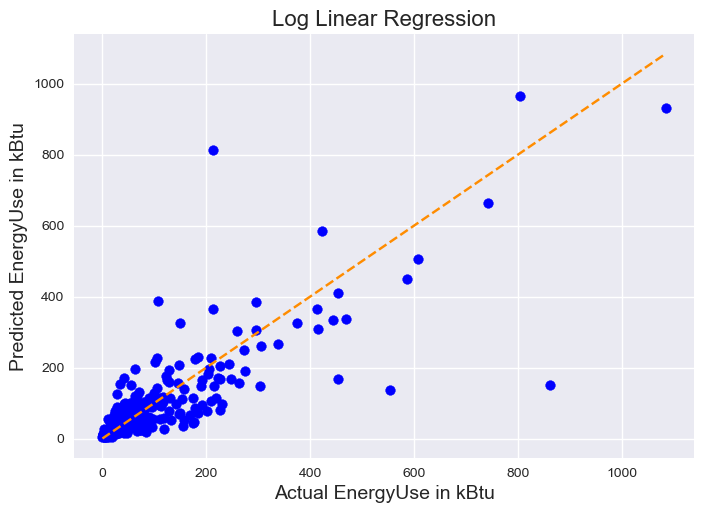

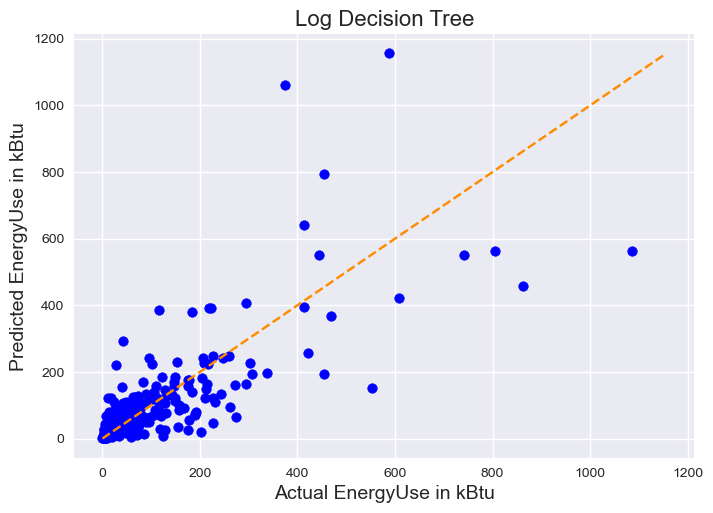

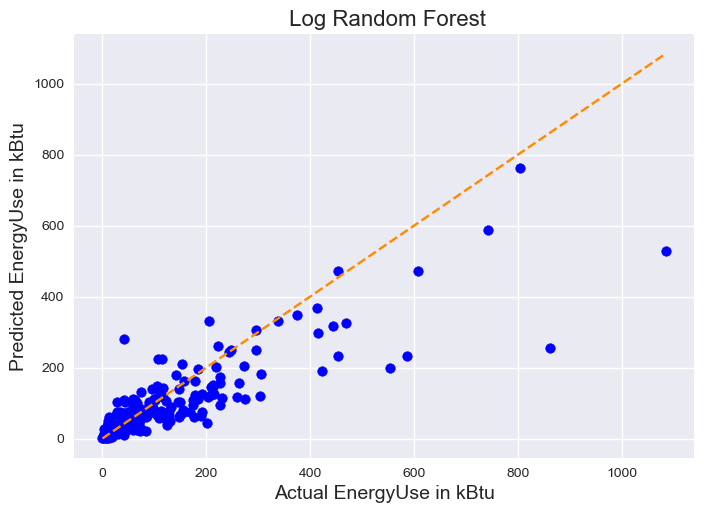

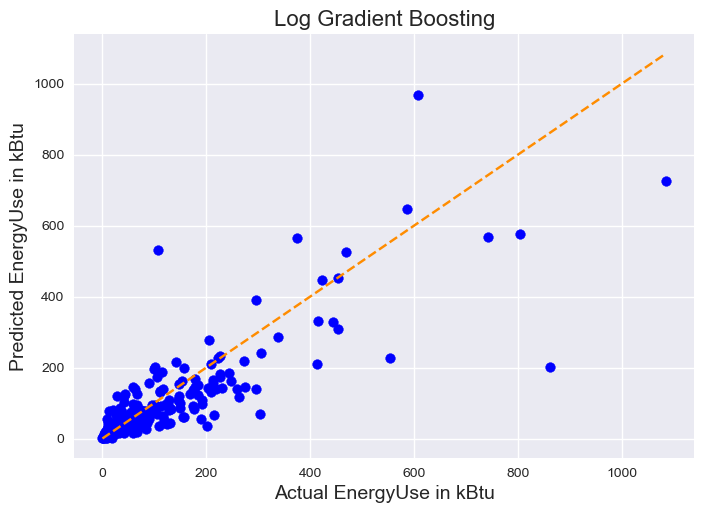

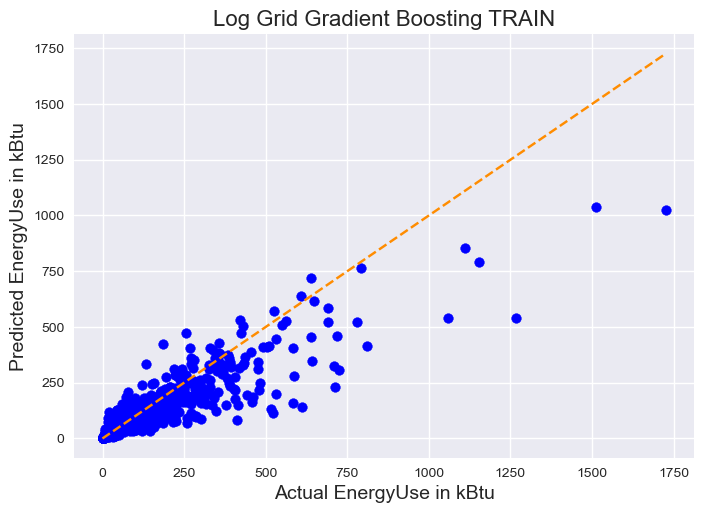

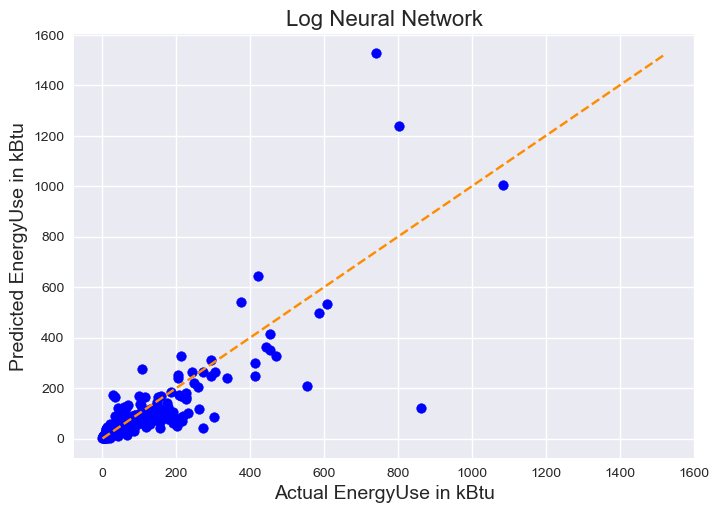

In [53]:
visualize((np.exp(y_test) - 1),prep_for_visualization(np.exp(ypred),(np.exp(y_test) - 1)),'Log Linear Regression', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(np.exp(yhat), (np.exp(y_test) - 1)),'Log Decision Tree', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(y_pred_forest, (np.exp(y_test) - 1)),' Log Random Forest', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(np.exp(y_pred_gradient) - 1, (np.exp(y_test) - 1)),'Log Gradient Boosting', 'blue', 'darkorange')
visualize((np.exp(y_train) - 1), prep_for_visualization(np.exp(grid_gradient.predict(X_train_std)) - 1, (np.exp(y_train) - 1)),'Log Grid Gradient Boosting TRAIN', 'blue', 'darkorange')
visualize((np.exp(y_test) - 1), prep_for_visualization(np.exp(y_pred_neural) - 1, (np.exp(y_test) - 1)),'Log Neural Network', 'blue', 'darkorange')

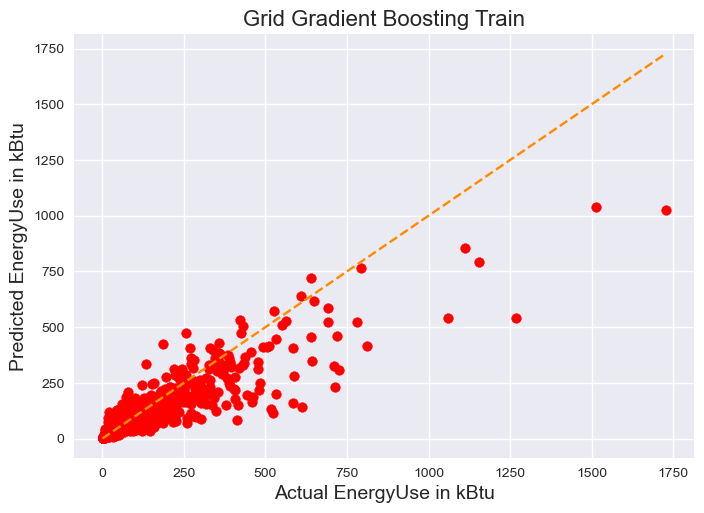

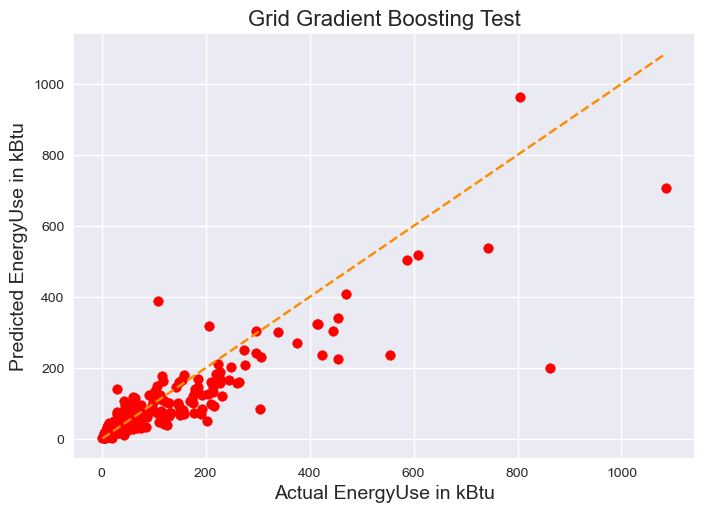

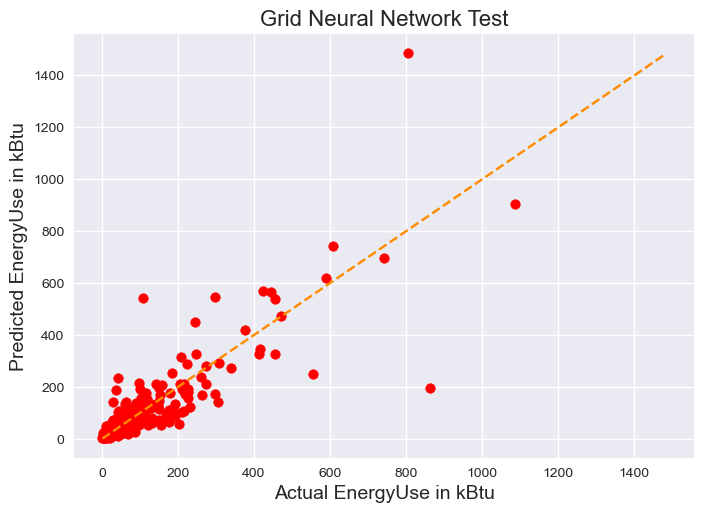

In [57]:
visualize(np.exp(y_train), prep_for_visualization(np.exp(y_pred_gradient_grid_train), np.exp(y_train)),'Grid Gradient Boosting Train', 'red', 'darkorange')
visualize(np.exp(y_test), prep_for_visualization(np.exp(y_pred_gradient_grid), np.exp(y_test)),'Grid Gradient Boosting Test', 'red', 'darkorange')
visualize(np.exp(y_test), prep_for_visualization(np.exp(y_pred_neural_grid), np.exp(y_test)),'Grid Neural Network Test', 'red', 'darkorange')

#### [COMMENT] mes donnees sont trop heterogenes - ex: les valeurs tres eleves sont pas assez representes ce qui fait que les valeurs explosent pour ce type de batiment

#### 3.1 Feature interdependence

<AxesSubplot:>

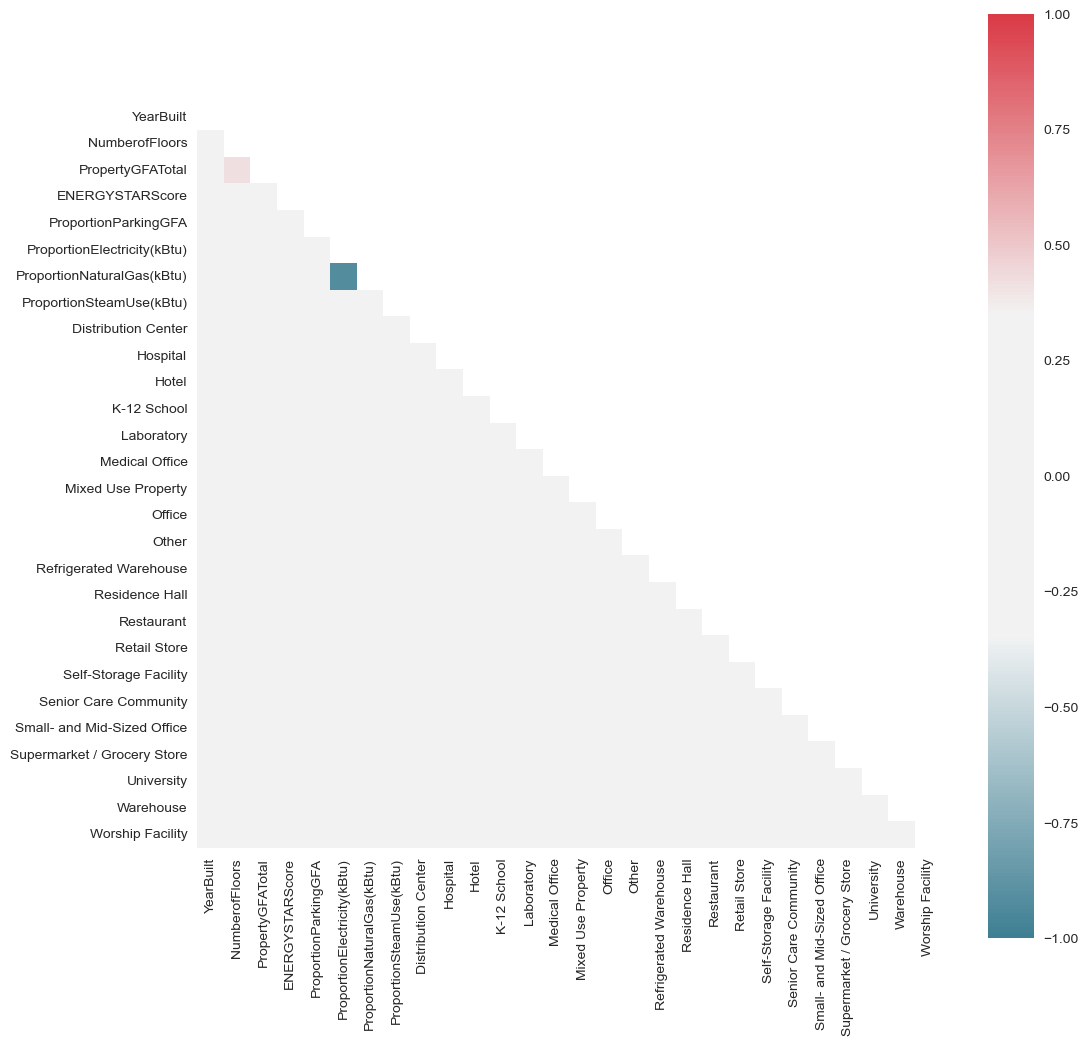

In [58]:
corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=90)
cmap.set_bad('white')

sns.heatmap(corr,square=True, mask = mask, cmap=cmap, vmin=-1,vmax=1,center=0)

#### 3.2 Model Deviance for test data

## 4. Feature Importance Analysis

In [59]:
shap.initjs()

### 4.2 Gradient Boosting

In [60]:
grad_reg_explainer1 = shap.TreeExplainer(best_est, X_train_std)

In [61]:
sample_idx = 0

shap_vals = grad_reg_explainer1.shap_values(X_test_std[sample_idx])

print("Expected/Base Value : ", grad_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", best_est.predict(X_test_std[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", grad_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  3.936937233037564

Shap Values for Sample 0 :  [ 5.04504512e-02  5.99515480e-03 -8.38760572e-01  2.74386750e-01
  1.06317177e-03  9.32628583e-01  1.00782131e-01 -3.56386107e-02
 -4.13202375e-01  0.00000000e+00 -7.48087391e-04  2.25404617e-03
  0.00000000e+00  1.15204845e-04 -3.73453277e-03  0.00000000e+00
 -5.15217584e-02 -1.20760668e-02  0.00000000e+00  0.00000000e+00
 -7.43526438e-03  1.44291125e-02 -1.98006062e-03 -4.92424275e-03
 -2.72828093e-02  1.77829030e-03  3.99551154e-02  1.22672290e-02]


Prediction From Model                            :  3.974748075598667
Prediction From Adding SHAP Values to Base Value :  3.975738093531357


#### 4.2 [Gradient Boosting] Global Feature Importance

In [62]:
X_train_std.shape

(1209, 28)

In [63]:
df.columns.shape

(28,)

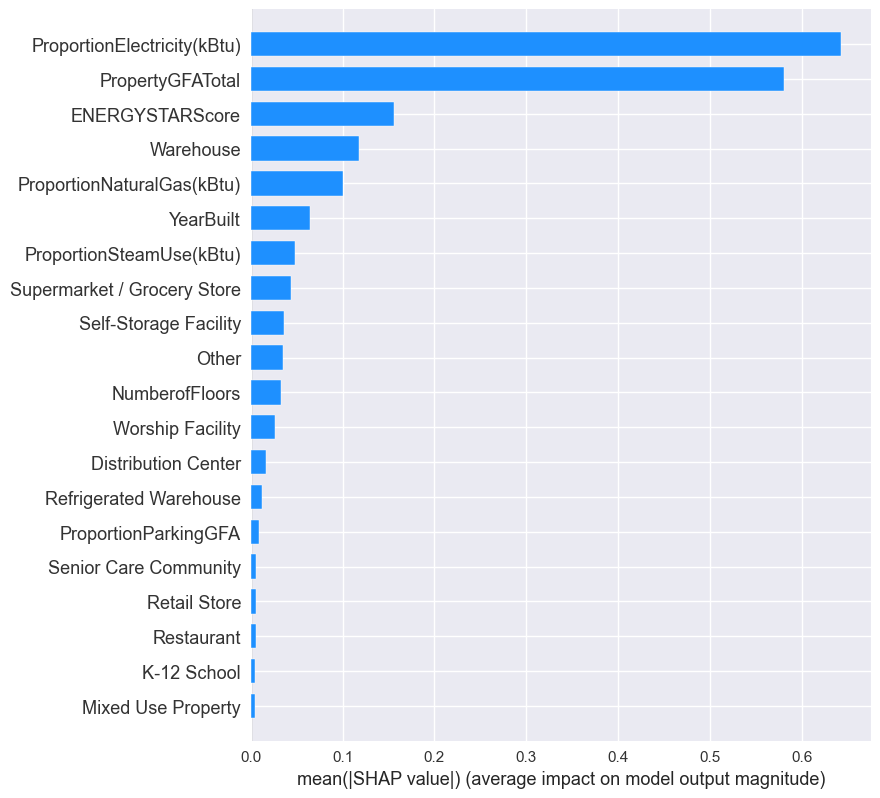

In [71]:
plt.figure(figsize=(8,10))
shap.summary_plot(grad_reg_explainer1.shap_values(X_train_std, check_additivity = False),
                  feature_names=df.columns,
                  plot_type="bar",
                  color="dodgerblue"
                  )

#### 4.4 [Gradient Boosting] Local Feature Importance

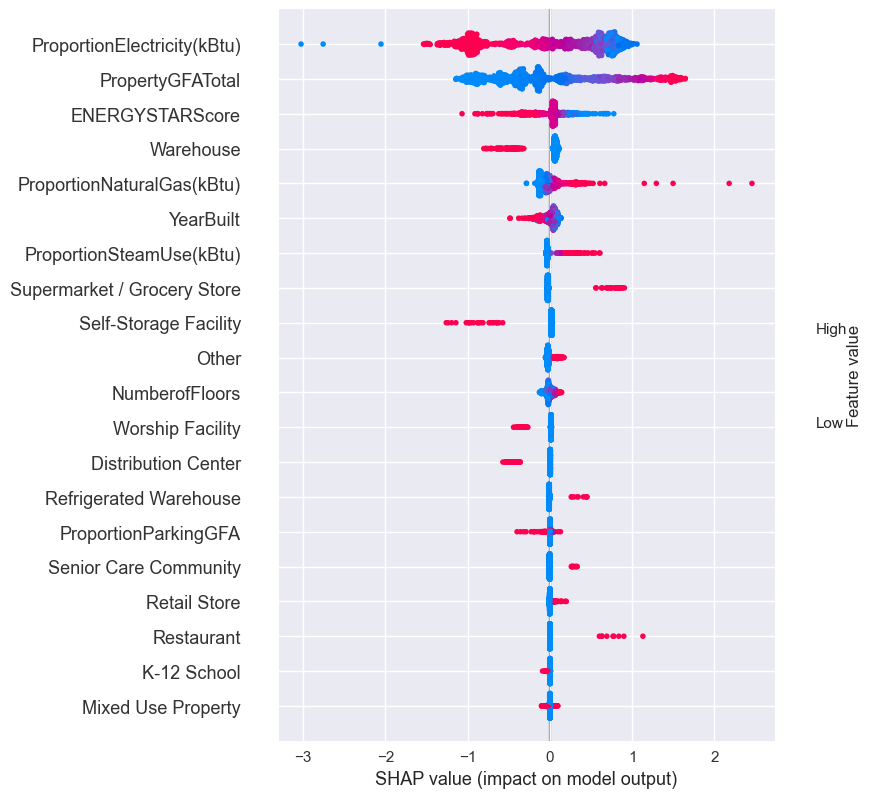

IndexError: list index out of range

<Figure size 800x550 with 0 Axes>

In [69]:
plt.figure(figsize=(8,10))
shap.summary_plot(grad_reg_explainer1.shap_values(X_train_std,  check_additivity = False),
                  features = X_train_std,
                  feature_names=df.columns)

plt.gcf().axes[-1].set_aspect(500)
plt.gcf().axes[-1].set_box_aspect(500)

##### [COMMENT] Property GFA plus les valeurs sont eleves, plus cela aura un impact positif sur la prediction.

In [134]:
r = permutation_importance(model_gradient, X_test_std, y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

model_gradient.score(X_test_std, y_test)

ProportionElectricity(kBtu)0.661 +/- 0.047
PropertyGFATotal0.566 +/- 0.047
ProportionNaturalGas(kBtu)0.277 +/- 0.028
Warehouse0.077 +/- 0.010
Supermarket / Grocery Store0.059 +/- 0.008
Worship Facility0.027 +/- 0.006
YearBuilt0.024 +/- 0.012
Self-Storage Facility0.020 +/- 0.006
Distribution Center0.018 +/- 0.007
ProportionSteamUse(kBtu)0.017 +/- 0.005
Laboratory0.014 +/- 0.004
Other   0.014 +/- 0.005
NumberofFloors0.008 +/- 0.004
K-12 School0.008 +/- 0.004
Retail Store0.004 +/- 0.002


0.7613702505555984

##### [COMMENT] Feature importance is the increase in model error when the feature’s information is destroyed.

The permutation feature importance takes into account:
- the main feature effect
- the interaction effects on model performance.
=> The importance of the interaction between two features is included in the importance measurements of both features. This means that the feature importances do not add up to the total drop in performance, but the sum is larger.
=> Only if there is no interaction between the features, as in a linear model, the importances add up approximately.